<a href="https://colab.research.google.com/github/ebatty/IntroCompNeuro/blob/main/lectures/02-NeuralResponses%26TuningCurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 - Neural Responses & Tuning Curves

**Learning objectives of lecture/notes**:
After lecture, students should be able to:
- Interpret information about neural firing from raster plots & PSTHs
- Know the steps for constructing raster plots & PSTHs
- Interpret information about neural response to a stimulus from a tuning curve


In [4]:
# @markdown Imports
import numpy as np
import matplotlib.pyplot as plt

# Section 1: Experimental set-up

In the next few sections, we will cover important concepts in the context of a case study. In this case study, you are a computational neuroscientist and you have a hypothesis that some neurons in monkey motor cortex correlate with the direction of arm movement while reaching. By this, you mean that a particular neuron will fire more when the monkey reaches in certain directions than others.  

You are able to record the spike times of a neuron from motor cortex in a monkey. 


**Stop and think!** What do you want the experiment to look like?


You choose an experimental set-up which will allow pretty easy analysis of the data. You have a monkey reach in eight different directions while recording from the neuron. Importantly, you have the monkey reach in each direction numerous times, not just once. You record the time the reach is initiated, perhaps by having the monkey hold onto a joystick with a sensor in it until they reach (the sensor can automatically record when the monkey lets go).


This is a typical experimental protocol in neuroscience: recording the spike times of a neuron while presenting the same stimulus over and over, or having the animal perform the same behavior over and over. Each presentation of the stimulus or iteration of the behavior is called a **trial**. Neurons are noisy - they do not respond exactly the same way every time they see the same stimulus or behavior - collecting multiple trials of data helps us better understand the neural responses and see how variable they are.

You go ahead and perform your experiment and collect a bunch of data. You now have the spike times of the neuron during multiple reachs in the same direction (and you have this for 8 different directions).

# Section 2: Visualizing Neural Reponses

The very first thing you should do when you collect new data or receive data from someone else is visualize it! The importance of this step cannot be overemphasized.



## Section 2.1: Raster Plots 

An excellent and common way to visualize neural spiking in multiple trials is a **raster plot**, an example of which can be found in Figure 1. In this style of plot, time is represented on the x-axis. Each spike is represented by a vertical line at the time it occurs. Each row (y-axis) can be a separate trial - in this case the raster plot displays a single neuron's responses over multiple trials and can be used to quickly assess response variability. Alternatively, each row can show the responses of a single neuron - in this case the raster plot displays a population of neuron's responses.

Note that the timing of each trial needs to be synced. In other words, the stimulus onset, or event onset, should happen at the same time in each trial. For example, the blue line in Figure 1 could indicate the time that the monkey starts the reach movement.

<img src="https://praneethnamburi.files.wordpress.com/2015/02/02_raster_baselineandstim.png" alt="rasterplotexample">

*Figure 1: An example raster plot, from https://praneethnamburi.com/category/matlab/*


**Stop and think!** What can you conclude about the neural responses to whatever the trial is from the raster in Figure 1?


From the raster, in Figure 1, you can see that the neuron tends to respond slightly more after the event (blue line) than before, but there are not very time-locked responses. In other words, there are not certain points in the trial where the neuron always responds.

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs10827-018-0693-9/MediaObjects/10827_2018_693_Fig3_HTML.png?as=webp" alt="rasterplotexample1">

*Figure 2: Another example raster plot, from https://link.springer.com/article/10.1007/s10827-018-0693-9*

**Stop and think!** What can you conclude about the neural responses to whatever the trial is from the raster in Figure 2?


From the raster in Figure 2 (the top row), you can see that the neuron responds in a time-locked manner - there are certain times during the trial where the neuron reliably spikes (the black columns indicate a spike in every row).

As mentioned above, we could also have the rows indicate different neurons - see Figure 3A for an example of this.

<img src="https://s3-eu-west-1.amazonaws.com/ppreviews-plos-725668748/1638070/preview.jpg" alt="rasterplotexample1">

*Figure 3: A) An example raster plot with rows as different neurons, from https://www.researchgate.net/publication/264865592_Large-Scale_High-Resolution_Multielectrode-Array_Recording_Depicts_Functional_Network_Differences_of_Cortical_and_Hippocampal_Cultures*

**Stop and think!** What can you conclude about the neural responses to whatever the trial is from the raster in Figure 3?


From the raster, in Figure 3, you can conclude that the neurons in the population are firing at similar times of the trial as each other.

## Section 2.2: PSTHs

We can summarize the information over trials contained in a raster plot in a peri-stimulus time histogram (PSTH), also sometimes called a peri-event time histogram (PETH). In this plot, we want to show the average underlying firing rate over time. To do that, we need to use discrete chunks of time - we divide time into time bins of some length. For each time bin, we can then count the number of spikes in that time bin over all the trials. We can then get the average spikes/bin for that time bin during the trial as the the number of spikes divided by the number of trials.

See Figure 4 for an example of the construction of a PSTH from 5 trials of neural data, where each trial is just 30 ms long. We use a bin width of 5 ms - the red vertical lines denote the bin edges. We then count up the number of spikes over all the trials (2 for the first time bin), divide by the number of trials (to get to 2/5 for the first time bin), and that is our average firing rate in spikes/bin for that part of the trial.




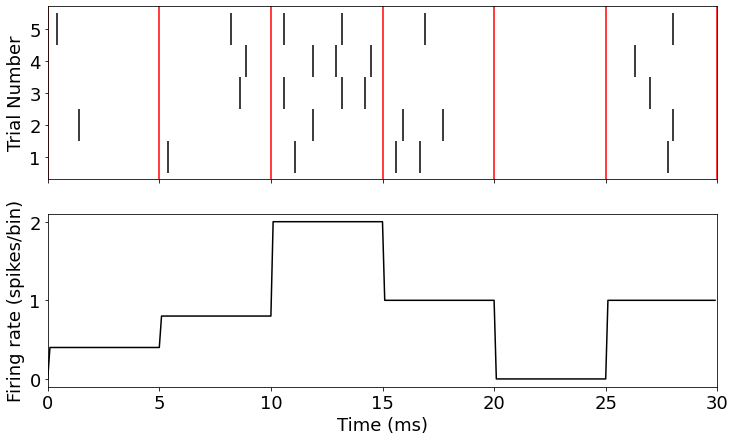

In [72]:
# @markdown 
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

all_sp_time_list = [np.array([5.4, 11.1, 15.6, 16.7, 27.8]),
                    np.array([1.4, 11.9, 15.9, 17.7, 28]),
                    np.array([8.6, 10.6, 13.2, 14.2, 27]),
                    np.array([8.9, 11.9, 12.9, 14.5, 26.3]),
                    np.array([.4, 8.2, 10.6, 13.2, 16.9, 28])]

# Make raster plot
fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# Make raster of this data
axes[0].eventplot(all_sp_time_list, colors = 'black')

# Label x and y axes (with units!)
axes[0].set( #xlabel = 'Time (ms)', 
       ylabel = 'Trial Number',
       xlim = [0, 30],
       ylim = [-.7, 4.7],
       yticks = [0, 1, 2, 3, 4],
       yticklabels = [1, 2, 3, 4, 5]);

# Plot bin vertical lines 
bin_width = 5
bin_edge_times = np.arange(0, 30.1, bin_width)
for bin_time in bin_edge_times:
  axes[0].plot([bin_time, bin_time], [-.7, 4.7], 'r')

# Make PSTH

binned_spikes, _ = np.histogram(np.concatenate(all_sp_time_list, axis=0), bins = bin_edge_times)

x_vals = np.arange(0, 30, .1)
y_vals = np.zeros((len(x_vals)))
for i_bin in range(len(bin_edge_times) - 1):
  y_vals[(x_vals > bin_edge_times[i_bin]) & (x_vals <= bin_edge_times[i_bin + 1])] = binned_spikes[i_bin] / 5

axes[1].plot(x_vals, y_vals,  'k');

axes[1].set(xlabel = 'Time (ms)', 
            ylabel = 'Firing rate (spikes/bin)');

*Figure 4: PSTH (bottom row) constructed from a raster plot (top row) with a bin width of 5 ms.*

**Stop and think!** What would happen if you choose a bin width that's too big? Too small?

Too big a bin and you might lose temporal information in the neural reponses because you're summing spikes over a long period of time. Too small a bin and the PSTH could be hard to interpret. For example, imagine if you chose a time bin small enough that there was almost always at most 1 spike in each, even across all trials. The PSTH would not convey much information. See Figures 5 and 6 to see too big a bin width and too small a bin width, respectively.

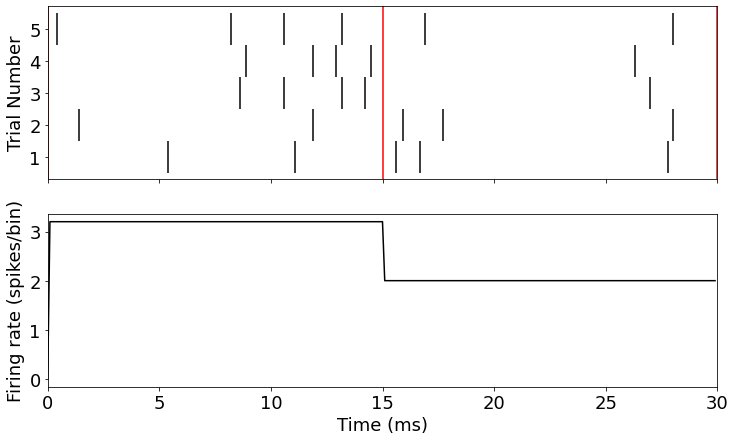

In [73]:
# @markdown 
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

all_sp_time_list = [np.array([5.4, 11.1, 15.6, 16.7, 27.8]),
                    np.array([1.4, 11.9, 15.9, 17.7, 28]),
                    np.array([8.6, 10.6, 13.2, 14.2, 27]),
                    np.array([8.9, 11.9, 12.9, 14.5, 26.3]),
                    np.array([.4, 8.2, 10.6, 13.2, 16.9, 28])]

# Make raster plot
fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# Make raster of this data
axes[0].eventplot(all_sp_time_list, colors = 'black')

# Label x and y axes (with units!)
axes[0].set( #xlabel = 'Time (ms)', 
       ylabel = 'Trial Number',
       xlim = [0, 30],
       ylim = [-.7, 4.7],
       yticks = [0, 1, 2, 3, 4],
       yticklabels = [1, 2, 3, 4, 5]);

# Plot bin vertical lines 
bin_width = 15
bin_edge_times = np.arange(0, 30.1, bin_width)
for bin_time in bin_edge_times:
  axes[0].plot([bin_time, bin_time], [-.7, 4.7], 'r')

# Make PSTH

binned_spikes, _ = np.histogram(np.concatenate(all_sp_time_list, axis=0), bins = bin_edge_times)

x_vals = np.arange(0, 30, .1)
y_vals = np.zeros((len(x_vals)))
for i_bin in range(len(bin_edge_times) - 1):
  y_vals[(x_vals > bin_edge_times[i_bin]) & (x_vals <= bin_edge_times[i_bin + 1])] = binned_spikes[i_bin] / 5

axes[1].plot(x_vals, y_vals,  'k');

axes[1].set(xlabel = 'Time (ms)', 
            ylabel = 'Firing rate (spikes/bin)');

*Figure 5: PSTH (bottom row) constructed from a raster plot (top row) with a bin width of 15 ms. This bin width is too large and you lose a lot of temporal information!*

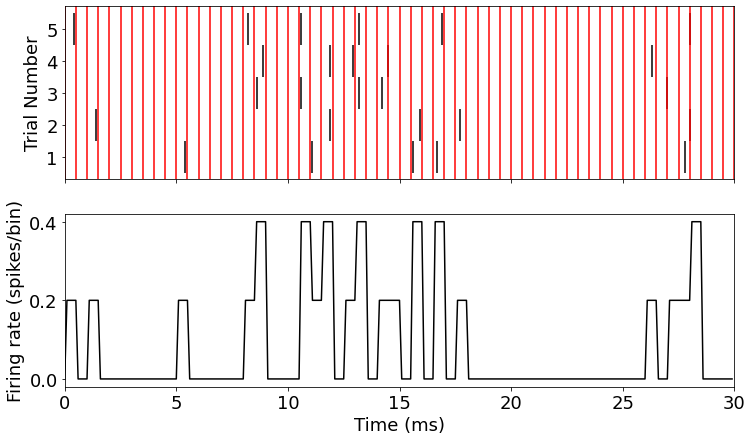

In [75]:
# @markdown 
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

all_sp_time_list = [np.array([5.4, 11.1, 15.6, 16.7, 27.8]),
                    np.array([1.4, 11.9, 15.9, 17.7, 28]),
                    np.array([8.6, 10.6, 13.2, 14.2, 27]),
                    np.array([8.9, 11.9, 12.9, 14.5, 26.3]),
                    np.array([.4, 8.2, 10.6, 13.2, 16.9, 28])]

# Make raster plot
fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# Make raster of this data
axes[0].eventplot(all_sp_time_list, colors = 'black')

# Label x and y axes (with units!)
axes[0].set( #xlabel = 'Time (ms)', 
       ylabel = 'Trial Number',
       xlim = [0, 30],
       ylim = [-.7, 4.7],
       yticks = [0, 1, 2, 3, 4],
       yticklabels = [1, 2, 3, 4, 5]);

# Plot bin vertical lines 
bin_width = .5
bin_edge_times = np.arange(0, 30.1, bin_width)
for bin_time in bin_edge_times:
  axes[0].plot([bin_time, bin_time], [-.7, 4.7], 'r')

# Make PSTH

binned_spikes, _ = np.histogram(np.concatenate(all_sp_time_list, axis=0), bins = bin_edge_times)

x_vals = np.arange(0, 30, .1)
y_vals = np.zeros((len(x_vals)))
for i_bin in range(len(bin_edge_times) - 1):
  y_vals[(x_vals > bin_edge_times[i_bin]) & (x_vals <= bin_edge_times[i_bin + 1])] = binned_spikes[i_bin] / 5

axes[1].plot(x_vals, y_vals,  'k');

axes[1].set(xlabel = 'Time (ms)', 
            ylabel = 'Firing rate (spikes/bin)');

*Figure 6: PSTH (bottom row) constructed from a raster plot (top row) with a bin width of .5 ms. This bin width is too small - the PSTH conveys a lot about the exact spike timings in this set of trials but doesn't give us a sense of how the underlying firing rate is changing over time*

# Tuning curves